In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import time

# Task 1: Load Dataset

### The Boston Housing Dataset 
This dataset in scikit-learn is not directly provided as a pandas DataFrame but as a Bunch object, which is similar to a dictionary. We need to explicitly convert it into a DataFrame using pandas.DataFrame.

In [54]:
boston = load_boston()

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target
# boston.target is the array containing the target variable (house prices)

In [55]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [56]:
data.shape

(506, 14)

#### Data Description
 Number of Instances: 506 

 Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
 <br>
 Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

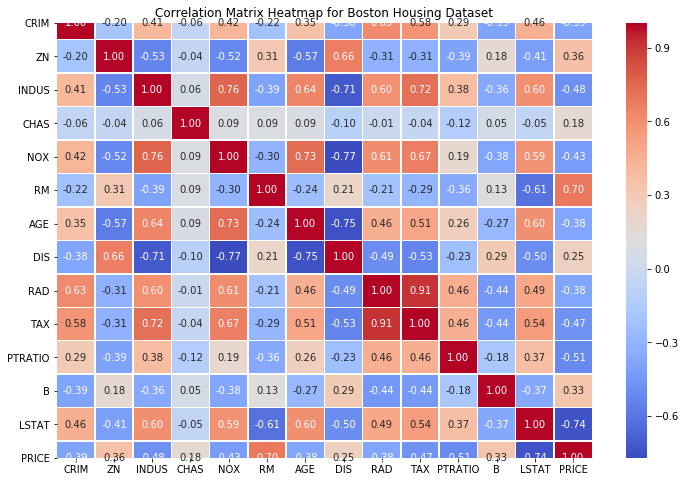

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Boston Housing Dataset")
plt.show()

RM: average number of rooms per dwelling has a high POSITIVE correlation with MEDV (0.7).

LSTAT: % lower status of the population has a high NEGATIVE corrleation with MEDV (-0.74)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


The dataset contains all float values and no null values. Thus it is ready to use.

# Task 2: Decision Tree Analysis


We now create features(the X variable) and the target variable(y), then split into training and testing datasets.

In [59]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [61]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: PRICE, dtype: float64

## Train a Decision Tree Regressor:

### How the decision tree works
A decision tree works by splitting data into subsets based on the most significant feature to predict the target variable.

#### Splitting Criteria
- The decision tree splits the data using features that minimize impurity, often using metrics like Gini impurity or entropy.

#### Information Gain
- Information gain measures how much uncertainty is reduced when a feature is used to split the data. A higher information gain indicates a better split.

#### Tree Depth
- Tree depth refers to the number of levels in the tree. 
  - Deeper trees can model more complex relationships but may overfit.
  - Shallow trees might underfit, failing to capture important patterns.

We use the inbuilt Decision Tree Regressor provided by scikit-learn, which simplifies the process of training and evaluating decision trees.

In [62]:
model = DecisionTreeRegressor(random_state=42,max_depth=7)

start_time = time.time()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

What are these parameters?
**`criterion`**: Defines the function to measure split quality (e.g., `'mse'` for Mean Squared Error).
**`max_depth`**: Limits the depth of the tree to prevent overfitting.
**`min_samples_split`**: Sets the minimum samples required to split an internal node.
**`random_state`**: Ensures reproducibility of results by setting a random seed.

In [63]:
dt_train_time = time.time() - start_time
print(f"Training time by Decision Tree: {dt_train_time}")

Training time by Decision Tree: 0.033035993576049805


In [64]:
# Predict on test set
y_pred = model.predict(X_test)

#### Model Evaluation

In [65]:
# Calculate MSE
dt_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {dt_mse}")

Mean Squared Error: 16.5021568627451


In [66]:
#Calculate R2 score
dt_r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {dt_r2}")

R2 Score: 0.77497196855823


#### Plotting the tree

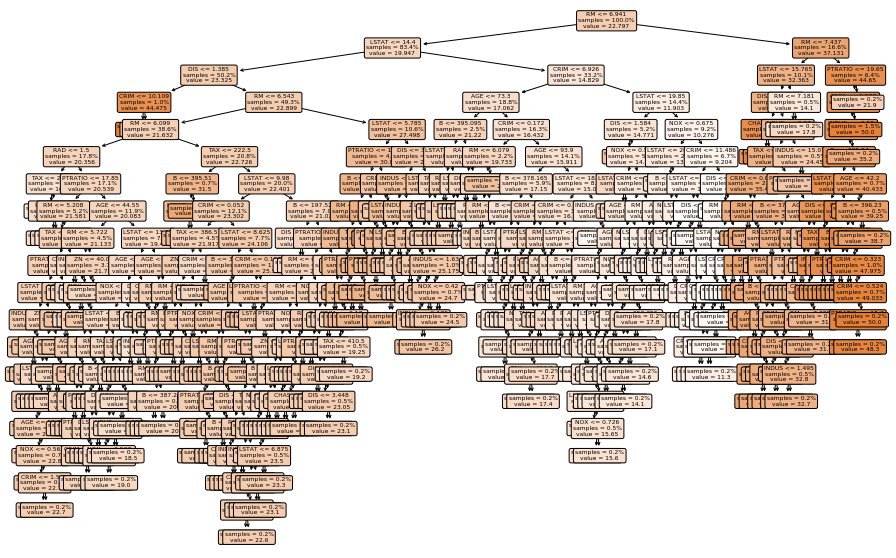

In [67]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, 
          feature_names=boston.feature_names, 
          filled=True, 
          fontsize=6,   
          impurity=False,  
          proportion=True, 
          rounded=True)     
plt.show()

# Task 3:Random Forest Analysis

A Random Forest combines multiple Decision Trees by creating random subsets of the training data (bootstrapping) and considering random features at each split. Each tree in the forest is trained independently on different data, and the final prediction is made by averaging the predictions of all trees (for regression) or taking a majority vote (for classification). This process improves the model's performance by reducing overfitting and increasing robustness.

Random Forest generally outperforms a single Decision Tree because it reduces the model's variance and sensitivity to noise. While a single tree may overfit the data and perform poorly on unseen data, Random Forest’s ensemble approach averages out errors from individual trees, resulting in more stable and accurate predictions. This combined approach leads to better generalization, making Random Forest more reliable than a single, deep Decision Tree.

In [68]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=7,  max_depth=5,  random_state=42)

In [69]:
# Train the model
start_time = time.time()
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [70]:
rf_train_time = time.time() - start_time
print(f"Training time by Random Forest: {rf_train_time}")

Training time by Random Forest: 0.031632423400878906


In [71]:
# Make predictions
y_pred_rf = model_rf.predict(X_test)

#### Model Evaluation

In [72]:
# Mean Square Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 12.506215395153589


In [73]:
# R2 Score
rf_r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {dt_r2}")

R2 Score: 0.77497196855823


#### Feature Importance Scores

Feature importance scores represent how much each feature contributes to the model's predictive accuracy. Higher scores indicate features that have a stronger influence on the model's predictions.

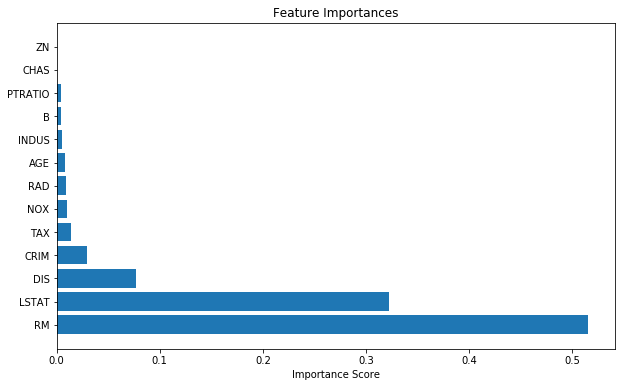

In [74]:
import matplotlib.pyplot as plt
import numpy as np

importances = model_rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), boston.feature_names[indices])
plt.xlabel("Importance Score")
plt.show()


Thus we can infer that the feature RM (average number of rooms) likely has the highest importance because it strongly correlates with house prices. On the other hand, ZN (proportion of residential land zoned for large lots) and CHAS (Charles River dummy variable) may have less direct impact on the price, leading to lower importance scores.

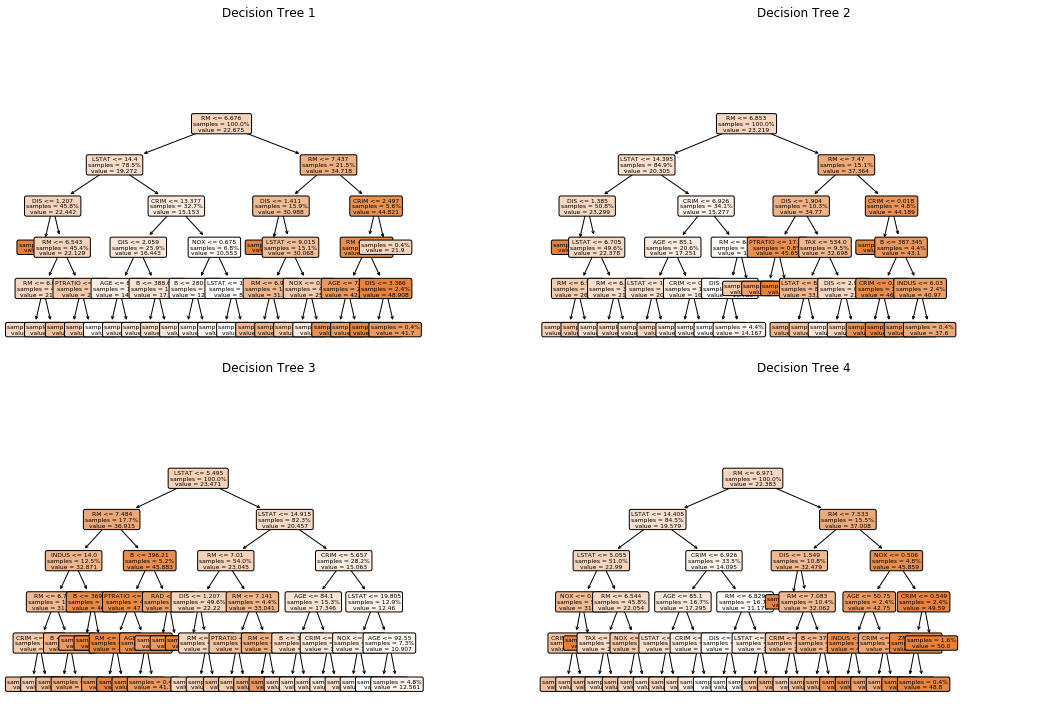

In [75]:
# Let us view 4 out of the seven trees that were build up in this random forest

plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_tree(model_rf.estimators_[i], 
              feature_names=boston.feature_names, 
              filled=True, 
              fontsize=6, 
              impurity=False, 
              proportion=True, 
              rounded=True)
    plt.title(f"Decision Tree {i+1}")
plt.tight_layout()
plt.show()

# Task 4: Discussion and Comparision

In [76]:
print("Decision Tree Performance:")
print(f"MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}, Training Time: {dt_train_time:.4f} seconds")

print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf:.4f}, R²: {rf_r2:.4f}, Training Time: {rf_train_time:.4f} seconds")

Decision Tree Performance:
MSE: 16.5022, R²: 0.7750, Training Time: 0.0330 seconds

Random Forest Performance:
MSE: 12.5062, R²: 0.7750, Training Time: 0.0316 seconds


### Decision Tree vs Random Forest Performance
The performance metrics indicate that the Random Forest model outperformed the Decision Tree in terms of Mean Squared Error (MSE), achieving a lower value (12.5062 vs. 16.5022), which suggests better predictive accuracy. 
 Additionally, the training time for the Random Forest (0.0316 seconds) was slightly faster than the Decision Tree (0.0330 seconds), which is notable given that Random Forest typically involves training multiple trees.
 
This improved performance of the Random Forest is due to its ensemble nature, where predictions from multiple decision trees are aggregated, reducing overfitting and enhancing overall model robustness.



### Strengths and Weaknesses Based on Performance

#### **Decision Tree**
- Strengths:  
  - Simplicity: Quick to train (0.0330 seconds) with straightforward interpretability.  
  - Handles non-linear data well and works efficiently for small datasets.  

- Weaknesses:  
  - Overfitting: Higher MSE (16.5022) suggests it struggles to generalize, likely fitting noise in the training data.  
  - Lack of robustness: Prone to instability; small changes in data can drastically alter the tree structure.  

#### Random Forest
- Strengths:  
  - Improved accuracy: Lower MSE (12.5062) due to ensemble averaging, reducing overfitting.  
  - Robustness: Aggregates predictions from multiple trees, making it less sensitive to data variability.  
  - Comparable training time (0.0316 seconds), despite its complexity.  

- Weaknesses:  
  - Less interpretable: The ensemble nature makes it harder to understand individual predictions.  
  - Computationally more demanding as the dataset grows, especially with a large number of trees.  

In this case, the **Random Forest** excelled due to its ability to generalize well, while the **Decision Tree**, though interpretable, struggled with accuracy.
